In [1]:
#importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Analisando dataset oil

In [2]:
data_oil = pd.read_csv("../datasets/oil.csv")

In [3]:
data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


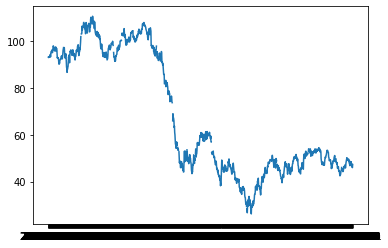

In [4]:
plt.plot(data_oil["date"], data_oil['dcoilwtico'])

In [5]:
data_oil.isna().sum().sum()

43

### Analisando dataset de treino

In [6]:
data_train = pd.read_csv("../datasets/train.csv")
data_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
data_train.corr()

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


In [8]:
data_train.isna().sum().sum()

0

In [9]:
data_train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

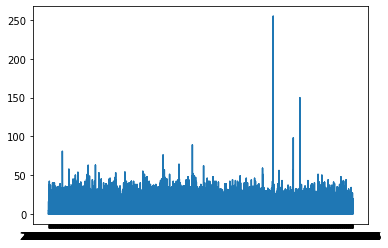

In [10]:
plt.plot(data_train[data_train['family'] == 'AUTOMOTIVE']['date'], 
         data_train[data_train['family'] == 'AUTOMOTIVE']['sales'])

### Analisando dataset holidays_events

In [11]:
data_hevents = pd.read_csv("../datasets/holidays_events.csv")

#pensei em tirar 'locale_name' tb, mas pode ser q influencie, dependendo
#do local q a loja ta instalada

data_hevents.drop('description', axis = 1, inplace = True)
data_hevents.head()

,date,type,locale,locale_name,transferred
0,2012-03-02,Holiday,Local,Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,False


In [12]:
data_hevents.shape

(350, 5)

In [13]:
#pensei em tirar as linhas nas quais a coluna 'transferred' == True, ja que
#o feriado nao foi naquela data

In [14]:
for idx, val in data_hevents['transferred'].items():
    if val == True:
        data_hevents.drop(axis = 0, index = idx, inplace = True)

In [15]:
data_hevents.shape

(338, 5)

In [16]:
data_hevents.drop(axis = 1, columns = ['transferred', 'locale'], inplace = True)

In [17]:
data_hevents.head()

,date,type,locale_name
0,2012-03-02,Holiday,Manta
1,2012-04-01,Holiday,Cotopaxi
2,2012-04-12,Holiday,Cuenca
3,2012-04-14,Holiday,Libertad
4,2012-04-21,Holiday,Riobamba


In [18]:
data_hevents.isna().sum().sum()

0

### Analisando dataset stores

In [20]:
data_stores = pd.read_csv("../datasets/stores.csv")
data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [21]:
data_stores.drop(axis = 1, columns = ['city', 'state'], inplace = True)
data_stores.head()

,store_nbr,type,cluster
0,1,D,13
1,2,D,13
2,3,D,8
3,4,D,9
4,5,D,4


In [22]:
data_stores.isna().sum().sum()

0

In [23]:
data_stores['store_nbr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [24]:
data_train['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [25]:
dict_cluster = {}
for idx, val in data_stores['store_nbr'].items():
    dict_cluster[str(val)] = data_stores.iloc[idx]['cluster']

In [26]:
dict_cluster

{'1': 13,
 '2': 13,
 '3': 8,
 '4': 9,
 '5': 4,
 '6': 13,
 '7': 8,
 '8': 8,
 '9': 6,
 '10': 15,
 '11': 6,
 '12': 15,
 '13': 15,
 '14': 7,
 '15': 15,
 '16': 3,
 '17': 12,
 '18': 16,
 '19': 15,
 '20': 6,
 '21': 6,
 '22': 7,
 '23': 9,
 '24': 1,
 '25': 1,
 '26': 10,
 '27': 1,
 '28': 10,
 '29': 10,
 '30': 3,
 '31': 10,
 '32': 3,
 '33': 3,
 '34': 6,
 '35': 3,
 '36': 10,
 '37': 2,
 '38': 4,
 '39': 6,
 '40': 3,
 '41': 4,
 '42': 2,
 '43': 10,
 '44': 5,
 '45': 11,
 '46': 14,
 '47': 14,
 '48': 14,
 '49': 11,
 '50': 14,
 '51': 17,
 '52': 11,
 '53': 13,
 '54': 3}